In [1]:
pip install scipy statsmodels scikit-learn numpy pandas matplotlib seaborn

In [2]:
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

df_Model1 = pd.read_csv("../Data Model/US_Model.csv")
df_Model2 = pd.read_csv("../Data Model/EU_Model.csv")
df_Model3 = pd.read_csv("../Data Model/IN_Model.csv")

smaller_df1 = pd.read_csv("../Clean Data/Spread_Cleaned_US.csv")
smaller_df2 = pd.read_csv("../Clean Data/Spread_Cleaned_EU.csv")
smaller_df3 = pd.read_csv("../Clean Data/Spread_Cleaned_IN.csv")

df_Model1['Date'] = pd.to_datetime(df_Model1['Date'])
df_Model2['Date'] = pd.to_datetime(df_Model2['Date'])
df_Model3['Date'] = pd.to_datetime(df_Model3['Date'])
smaller_df1['Date'] = pd.to_datetime(smaller_df1['Date'])
smaller_df2['Date'] = pd.to_datetime(smaller_df2['Date'])
smaller_df3['Date'] = pd.to_datetime(smaller_df3['Date'])

df1 = pd.merge(df_Model1, smaller_df1, on='Date', suffixes=('', '_smaller'))
df2 = pd.merge(df_Model2, smaller_df2, on='Date', suffixes=('', '_smaller'))
df3 = pd.merge(df_Model3, smaller_df3, on='Date', suffixes=('', '_smaller'))

df1["CSR"] = df1["Theoretical_Spread"] / df1["PX_LAST"] *100
df2["CSR"] = df2["Theoretical_Spread"] / df2["PX_LAST"] *100
df3["CSR"] = df3["Theoretical_Spread"] / df3["PX_LAST"] *100
df1["FSR"] = 200*df1["PX_SPREAD"] / (df1["PX_ASK"] + df1["PX_BID"])
df2["FSR"] = 200*df2["PX_SPREAD"] / (df2["PX_ASK"] + df2["PX_BID"])
df3["FSR"] = 200*df3["PX_SPREAD"] / (df3["PX_ASK"] + df3["PX_BID"])

t_stat1, p_value1 = ttest_rel(df1['CSR'], df1['FSR'])
t_stat2, p_value2 = ttest_rel(df2['CSR'], df2['FSR'])
t_stat3, p_value3 = ttest_rel(df3['CSR'], df3['FSR'])



rmse1 = mean_squared_error(df1['FSR'],df1['CSR'], squared=False)
rmse2 = mean_squared_error(df2['FSR'],df2['CSR'], squared=False)
rmse3 = mean_squared_error(df3['FSR'],df3['CSR'], squared=False)
mae1 = mean_absolute_error(df1['FSR'],df1['CSR'])
mae2 = mean_absolute_error(df2['FSR'],df2['CSR'])
mae3 = mean_absolute_error(df3['FSR'],df3['CSR'])


correlation_us, p_value_us = pearsonr(df1["CSR"], df1["FSR"])
correlation_eu, p_value_eu = pearsonr(df2["CSR"], df2["FSR"])
correlation_in, p_value_in = pearsonr(df3["CSR"], df3["FSR"])

test = {
    'Metric': ["Sample" , "df", "Mean Futures Spread Ratio", "Mean CFD Spread Ratio", "t-statistic", "p-value", "Alpha", "H0", "RMSE", "MAE", "Correlation Coefficient", "Correlation (p-value)"],
    'US': [len(df1),  len(df1)-1, df1["FSR"].mean(), df1["CSR"].mean(),t_stat1, "<0.001" if p_value1<0.001 else p_value1, 0.025, "Reject" if p_value1<0.025 else "Accept", rmse1, mae1, correlation_us, p_value_us],
    'EU': [len(df2),  len(df2)-1, df2["FSR"].mean(), df2["CSR"].mean(),t_stat2, "<0.001" if p_value2<0.001 else p_value2, 0.025, "Reject" if p_value2<0.025 else "Accept" ,rmse2, mae2, correlation_eu, p_value_eu],
    'IN': [len(df3), len(df3)-1, df3["FSR"].mean(), df3["CSR"].mean(), t_stat3, "<0.001" if p_value3<0.001 else p_value3, 0.025, "Reject" if p_value3<0.025 else "Accept", rmse3, mae3, correlation_in, p_value_in]
}
test_df = pd.DataFrame(test)
print(test_df.to_csv(sep='\t', index=False, float_format='%.4f'))

Metric	US	EU	IN
Sample	197	197	187
df	196	196	186
Mean Futures Spread Ratio	0.009660374452139759	0.025803357478712888	0.010570629211131515
Mean CFD Spread Ratio	0.020841884819098735	0.023401959182092365	0.022703333535772544
t-statistic	26.7071619283292	-3.0639286935942303	14.81659530296457
p-value	<0.001	0.0024919407931266817	<0.001
Alpha	0.025	0.025	0.025
H0	Reject	Reject	Reject
RMSE	0.01262466198383706	0.01123240403667512	0.016490031686952532
MAE	0.011388788060481346	0.007327486987916746	0.013448645098768355
Correlation Coefficient	0.12550440536067312	0.1384948829737277	0.05192480736335122
Correlation (p-value)	0.07886956014214691	0.05227509311887171	0.48032726037362944



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


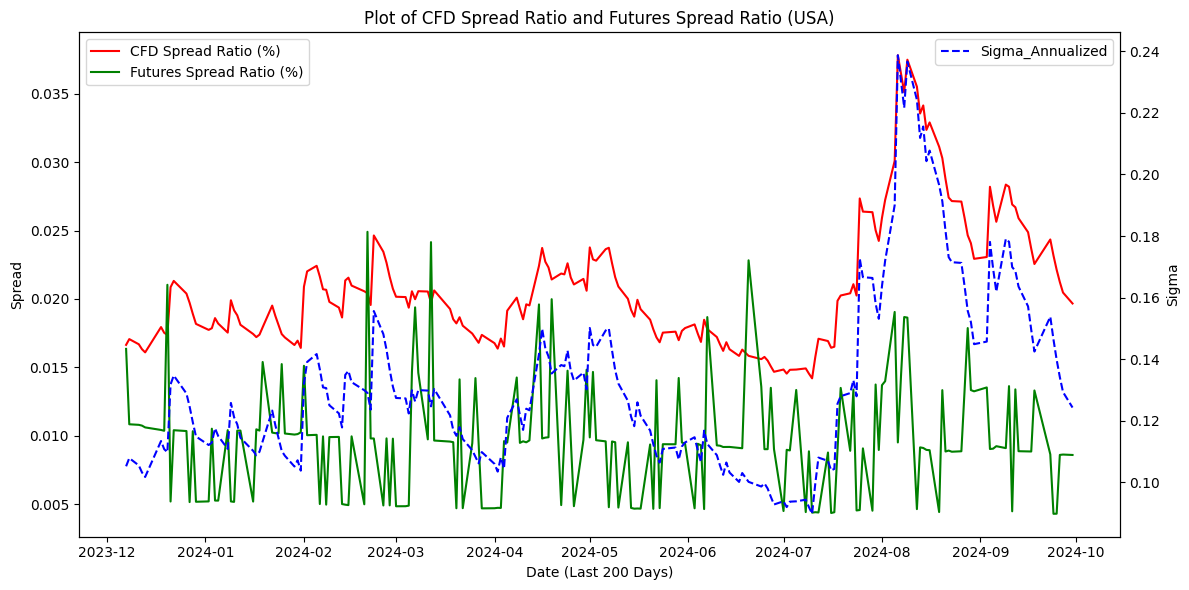

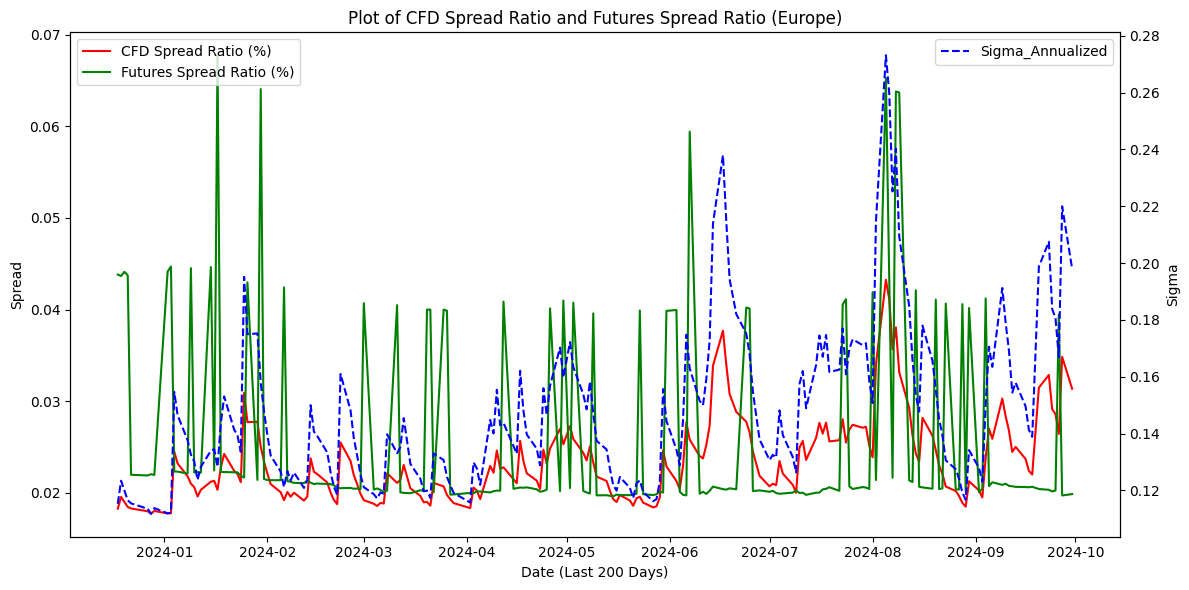

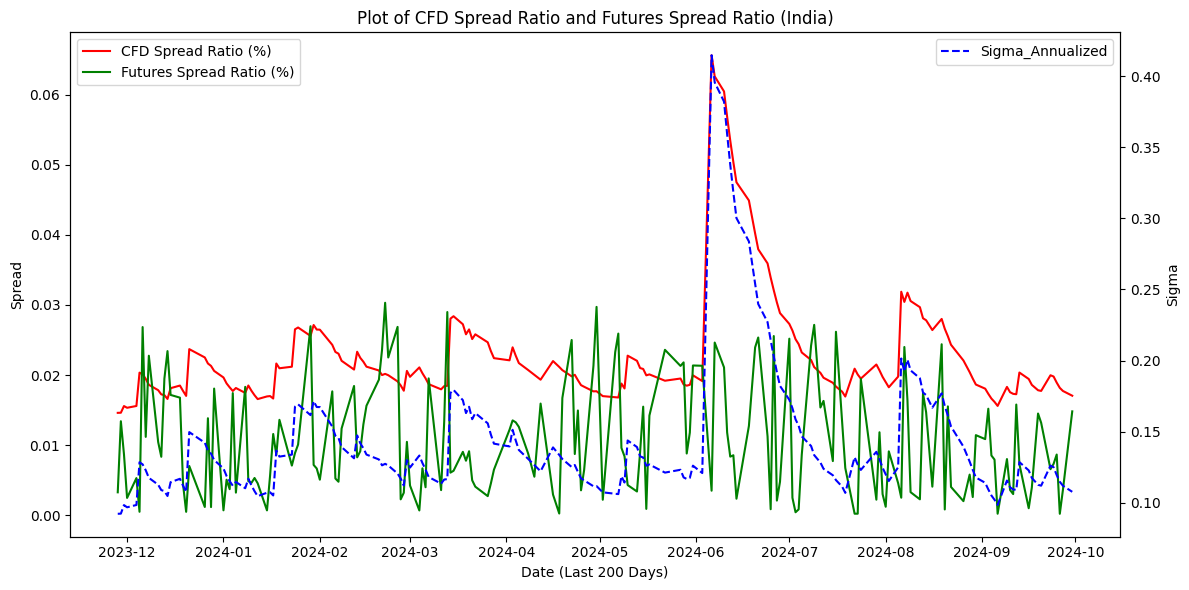

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Plot of CFD Spread Ratio and Futures Spread Ratio (USA)')
ax1.plot('Date', 'CSR', data=df1,color='r', label='CFD Spread Ratio (%)', linewidth=1.5)
ax1.plot('Date', 'FSR', data=df1,color='g', label='Futures Spread Ratio (%)', linewidth=1.5)
ax1.set_xlabel("Date (Last 200 Days)")
ax1.set_ylabel("Spread")
plt.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot('Date', 'Sigma_Annualized', data=df1,color='b', label='Sigma_Annualized', linewidth=1.5, linestyle='--')
ax2.set_ylabel("Sigma")
plt.legend(loc='upper right')
fig.tight_layout()

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Plot of CFD Spread Ratio and Futures Spread Ratio (Europe)')
ax1.plot('Date', 'CSR', data=df2,color='r', label='CFD Spread Ratio (%)', linewidth=1.5)
ax1.plot('Date', 'FSR', data=df2,color='g', label='Futures Spread Ratio (%)', linewidth=1.5)
ax1.set_xlabel("Date (Last 200 Days)")
ax1.set_ylabel("Spread")
plt.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot('Date', 'Sigma_Annualized', data=df2,color='b', label='Sigma_Annualized', linewidth=1.5, linestyle='--')
ax2.set_ylabel("Sigma")
plt.legend(loc='upper right')
fig.tight_layout()

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Plot of CFD Spread Ratio and Futures Spread Ratio (India)')
ax1.plot('Date', 'CSR', data=df3,color='r', label='CFD Spread Ratio (%)', linewidth=1.5)
ax1.plot('Date', 'FSR', data=df3,color='g', label='Futures Spread Ratio (%)', linewidth=1.5)
ax1.set_xlabel("Date (Last 200 Days)")
ax1.set_ylabel("Spread")
plt.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot('Date', 'Sigma_Annualized', data=df3,color='b', label='Sigma_Annualized', linewidth=1.5, linestyle='--')
ax2.set_ylabel("Sigma")
plt.legend(loc='upper right')
fig.tight_layout()



plt.show()

In [4]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from scipy.stats import levene, bartlett
from scipy.stats import ks_2samp

X1 = sm.add_constant(df1['FSR'])
y1 = df1['CSR']
model1 = sm.OLS(y1, X1).fit()
residuals1 = model1.resid
exog1 = model1.model.exog
white_test1 = het_white(residuals1, exog1)

X2 = sm.add_constant(df2['FSR'])
y2 = df2['CSR']
model2 = sm.OLS(y2, X2).fit()
residuals2 = model2.resid
exog2 = model2.model.exog
white_test2 = het_white(residuals2, exog2)

X3 = sm.add_constant(df3['FSR'])
y3 = df3['CSR']
model3 = sm.OLS(y3, X3).fit()
residuals3 = model3.resid
exog3 = model3.model.exog
white_test3 = het_white(residuals3, exog3)


levene_stat1, levene_p_value1 = levene(df1['CSR'], df1['FSR'])
levene_stat2, levene_p_value2 = levene(df2['CSR'], df2['FSR'])
levene_stat3, levene_p_value3 = levene(df3['CSR'], df3['FSR'])
bartlett_stat1, bartlett_p_value1 = bartlett(df1['CSR'], df1['FSR'])
bartlett_stat2, bartlett_p_value2 = bartlett(df2['CSR'], df2['FSR'])
bartlett_stat3, bartlett_p_value3 = bartlett(df3['CSR'], df3['FSR'])
ks_stat1, ks_p_value1 = ks_2samp(df1['CSR'], df1['FSR'])
ks_stat2, ks_p_value2 = ks_2samp(df2['CSR'], df2['FSR'])
ks_stat3, ks_p_value3 = ks_2samp(df3['CSR'], df3['FSR'])

Residual = {
    "Metric": ["White Test Statistic","White Test p-value", "Levene's Test Statistic", "Levene's Test (p-value)", "Bartlett's Test Statistic", "Bartlett's Test (p-value)", "KS-Test Statistic", "KS-Test (p-value)"],
    "US": [white_test1[0], white_test1[1], levene_stat1, levene_p_value1, bartlett_stat1, bartlett_p_value1, ks_stat1, ks_p_value1 ],
    "EU": [white_test2[0], white_test2[1], levene_stat2, levene_p_value2, bartlett_stat2, bartlett_p_value2, ks_stat2, ks_p_value2 ],
    "IN": [white_test3[0], white_test3[1], levene_stat3, levene_p_value3, bartlett_stat3, bartlett_p_value3, ks_stat3, ks_p_value3 ]
}

Residual_df = pd.DataFrame(Residual)
for column in Residual_df.columns[1:]:
    Residual_df[column] = Residual_df[column].apply(lambda x: "<0.001" if isinstance(x, (int, float)) and x < 0.001 else x)

print(Residual_df.to_csv(sep='\t', index=False, float_format='%.4f'))

Metric	US	EU	IN
White Test Statistic	2.6656178780243693	23.676966506210555	0.8684916195414809
White Test p-value	0.2637354032075717	<0.001	0.6477530118949868
Levene's Test Statistic	2.503883453627821	8.850246764962602	8.85446720727476
Levene's Test (p-value)	0.1143723961726696	0.0031118783048935737	0.003114751454649596
Bartlett's Test Statistic	3.2751891554476047	128.11292948194105	0.2864192467790583
Bartlett's Test (p-value)	0.07033481808638858	<0.001	0.5925243518918453
KS-Test Statistic	0.8934010152284264	0.27411167512690354	0.732620320855615
KS-Test (p-value)	<0.001	<0.001	<0.001



In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

df1['Spread_Diff'] = df1['FSR'] - df1['CSR']
df1['Date_ordinal'] = df1['Date'].map(lambda x: x.toordinal())
X1 = sm.add_constant(df1['Date_ordinal'])
model_trend1 = smf.ols(formula='Spread_Diff ~ Date_ordinal', data=df1).fit()
print("USA")
print(model_trend1.summary())

df2['Spread_Diff'] = df2['FSR'] - df2['CSR']
df2['Date_ordinal'] = df2['Date'].map(lambda x: x.toordinal())
X2 = sm.add_constant(df2['Date_ordinal'])
model_trend2 = smf.ols(formula='Spread_Diff ~ Date_ordinal', data=df2).fit()
print("Europe")
print(model_trend2.summary())

df3['Spread_Diff'] = df3['FSR'] - df3['CSR']
df3['Date_ordinal'] = df3['Date'].map(lambda x: x.toordinal())
X3 = sm.add_constant(df3['Date_ordinal'])
model_trend3 = smf.ols(formula='Spread_Diff ~ Date_ordinal', data=df3).fit()
print("India")
print(model_trend3.summary())

USA
                            OLS Regression Results                            
Dep. Variable:            Spread_Diff   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     31.03
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           8.37e-08
Time:                        04:50:28   Log-Likelihood:                 747.47
No. Observations:                 197   AIC:                            -1491.
Df Residuals:                     195   BIC:                            -1484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.8925      3.394      5.56

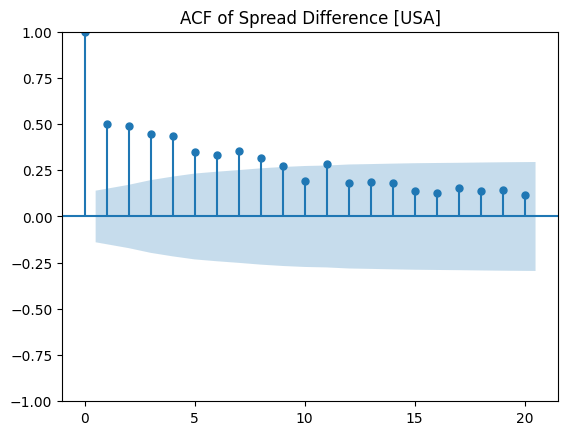

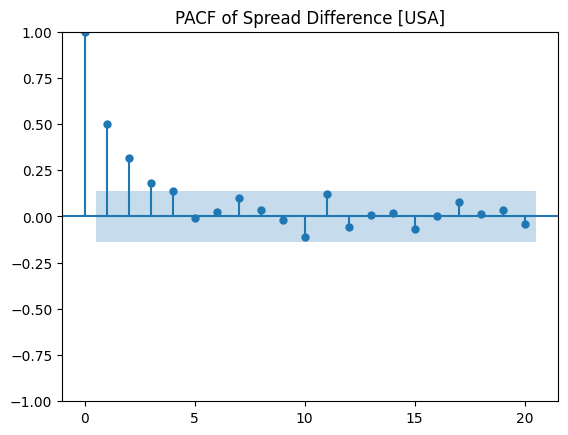

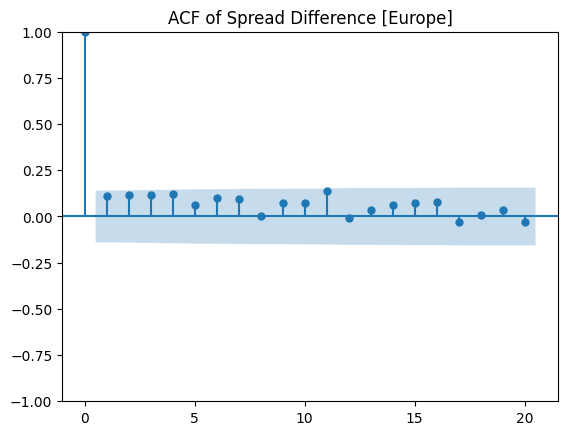

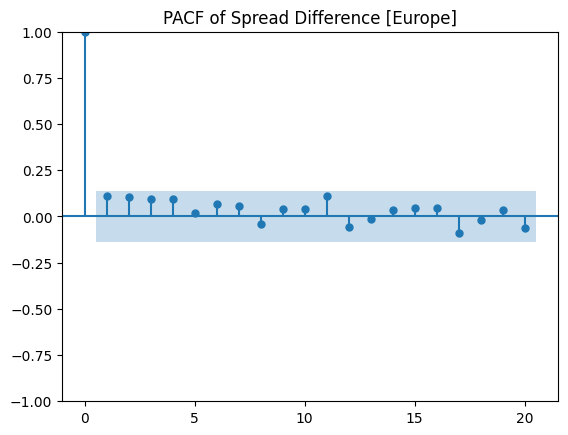

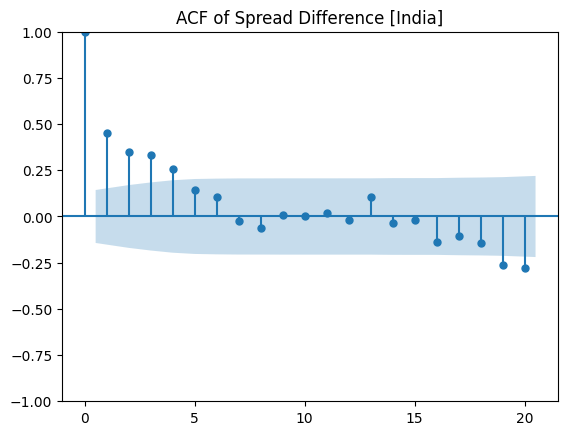

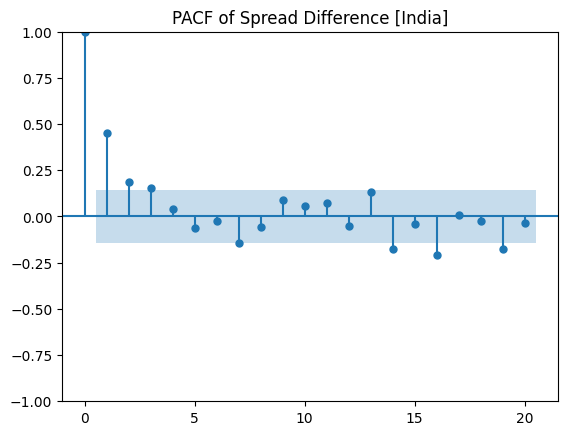

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1['Spread_Diff'].dropna(), lags=20)
plt.title("ACF of Spread Difference [USA]")
plot_pacf(df1['Spread_Diff'].dropna(), lags=20)
plt.title("PACF of Spread Difference [USA]")

plot_acf(df2['Spread_Diff'].dropna(), lags=20)
plt.title("ACF of Spread Difference [Europe]")
plot_pacf(df2['Spread_Diff'].dropna(), lags=20)
plt.title("PACF of Spread Difference [Europe]")

plot_acf(df3['Spread_Diff'].dropna(), lags=20)
plt.title("ACF of Spread Difference [India]")
plot_pacf(df3['Spread_Diff'].dropna(), lags=20)
plt.title("PACF of Spread Difference [India]")

plt.show()

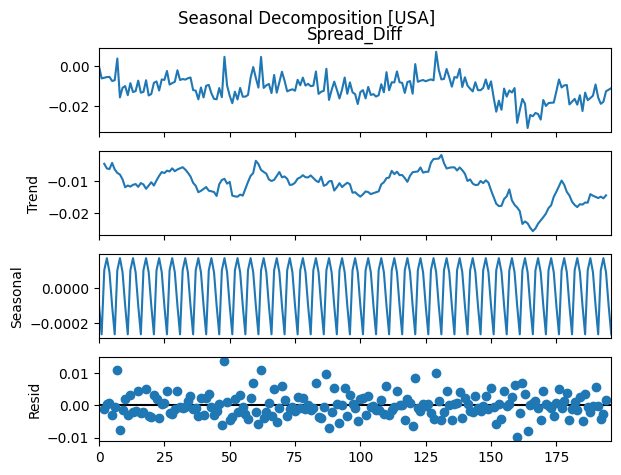

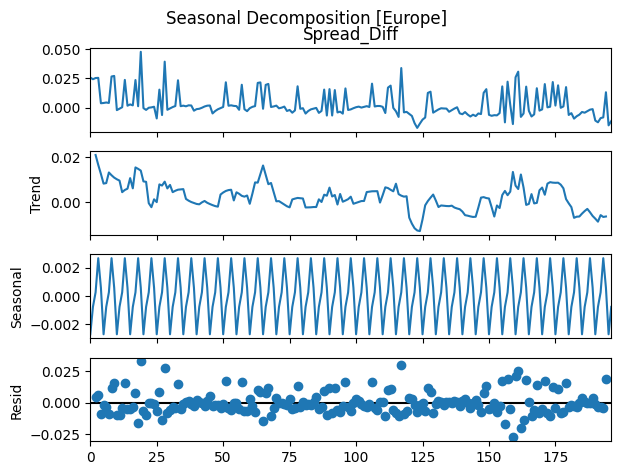

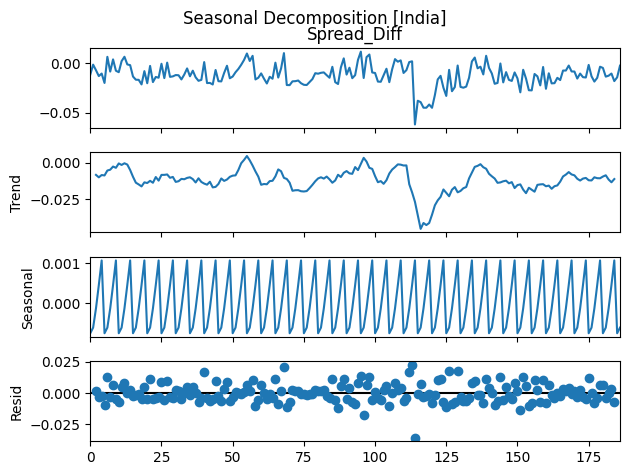

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(df1['Spread_Diff'], model='additive', period=5)
decomposition2 = seasonal_decompose(df2['Spread_Diff'], model='additive', period=5)
decomposition3 = seasonal_decompose(df3['Spread_Diff'], model='additive', period=5)
fig1 = decomposition1.plot()
fig1.suptitle("Seasonal Decomposition [USA]", fontsize=12)
plt.subplots_adjust(top=0.9)
fig2 = decomposition2.plot()
fig2.suptitle("Seasonal Decomposition [Europe]", fontsize=12)
plt.subplots_adjust(top=0.9)
fig3 = decomposition3.plot()
fig3.suptitle("Seasonal Decomposition [India]", fontsize=12)
plt.subplots_adjust(top=0.9)
plt.show()